In [1]:
import numpy as np

# Simple case

In [130]:
X = np.array([
    [1, 2],
    [2, 3],
    [3, 2],

    [5, 5],
    [6, 6],
    [7, 5],
])

y = np.array([1,1,1, -1,-1,-1])

In [114]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm






geom margin = -7.071067811865474


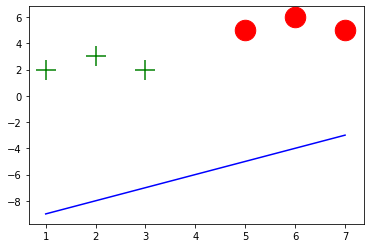

In [115]:
w = np.array([-0.1,0.1])
b = 1

draw_decision_boundary(w, b)

In [131]:
def geometric_margin(w, b):
    w_norm = np.sqrt(w@w)
    margins = y*(X@w+b)/w_norm
    return np.min(margins)

In [133]:
y*(X@w+b)/w_norm

array([ 11.,  11.,   9., -10., -10.,  -8.])

In [134]:
geometric_margin(w, b)

-7.071067811865474

In [118]:
def draw_decision_boundary(w, b):
    w = np.array(w)
    pos_x1 = X[:3, 0]
    pos_x2 = X[:3, 1]

    neg_x1 = X[3:, 0]
    neg_x2 = X[3:, 1]

    fig = plt.figure()


    plt.scatter(pos_x1,pos_x2, marker='+', color='green', s=420)
    plt.scatter(neg_x1,neg_x2, marker='o', color='red', s=420)
    x1_draw = np.linspace(X.min(), X.max())
    x2_draw = [(w[0]*x1 + b)/-w[1] for x1 in x1_draw]
    plt.plot(x1_draw, x2_draw, color='blue')
    print(f'geom margin = {geometric_margin(w,b)}')

geom margin = -7.071067811865474


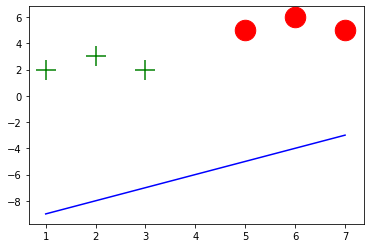

In [119]:
draw_decision_boundary(w,b )

In [120]:
from scipy.optimize import minimize

In [121]:
def geom_margin_minimize(args):
    return -geometric_margin(w, args) + 1


minimize(geom_margin_minimize, x0=(-.2), method='L-BFGS-B', bounds=[(-100,100)])

      fun: 1.3535534051008509
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.16955241])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 150
      nit: 5
   status: 2
  success: False
        x: array([0.05])

geom margin = -0.35355339059327373


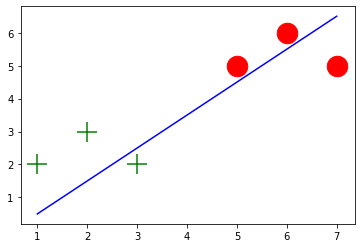

In [122]:
draw_decision_boundary(w,.05)

In [123]:
def geom_margin_minimize(args):
    w = np.array(args[:2])
    b = args[2]
    return -geometric_margin(w, b) + 1


minimize(geom_margin_minimize, x0=(-.2, -.3, .3), method='L-BFGS-B', bounds=[(-1,1), (-1,1), (-100, 100)])

      fun: -0.7677616033940513
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([28.26406078, 28.26434589,  7.53700373])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 680
      nit: 24
   status: 0
  success: True
        x: array([-0.09381759, -0.09381475,  0.70362198])

geom margin = 1.7675958970876797


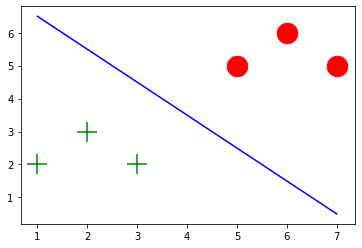

In [124]:
draw_decision_boundary([-0.09381759, -0.09381475],0.7036 )

In [125]:
from sklearn import svm

In [126]:
clf = svm.SVC(kernel='linear')

In [127]:
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
clf.coef_, clf.intercept_

(array([[-0.4, -0.4]]), array([3.]))

geom margin = 1.7677669529663684


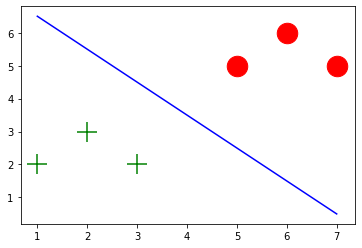

In [138]:
draw_decision_boundary([-0.4, -.4],3 )

In [143]:
w_opt = np.array([-0.4, -0.4])
b_opt = 3
ms = y*(X@w_opt+b_opt)/np.sqrt(w_opt@w_opt)
ms

array([3.18198052, 1.76776695, 1.76776695, 1.76776695, 3.18198052,
       3.18198052])

In [144]:
np.min(ms)

1.7677669529663684

In [145]:
def geometric_margin(w, b):
    w_norm = np.sqrt(w@w)
    margins = y*(X@w+b)/w_norm
    return np.min(margins)

In [146]:
geometric_margin(w_opt, b_opt)

1.7677669529663684